In [125]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
drive.mount('/content/drive')
path = "/content/drive/MyDrive/housing[1].csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
def linear(X, b0, b1):
    return [b0+b1*x for x in X]

def intercept(X, Y, b1):
    x_ = np.mean(X)
    y_ = np.mean(Y)

    return y_-b1*x_

def slope(X, Y):
    x_ = np.mean(X)
    y_ = np.mean(Y)

    rise = sum([(x-x_) * (y-y_) for x,y in zip(X,Y)])
    run = sum([(x-x_)**2 for x,y in zip(X,Y)])

    return rise / run

In [129]:
df = pd.read_csv(path)
df = df.drop(columns = "ocean_proximity")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [130]:
print("Rows {} Columns {}".format(df.shape[0], df.shape[1]))

Rows 20640 Columns 9


In [131]:
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

,dtype
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64


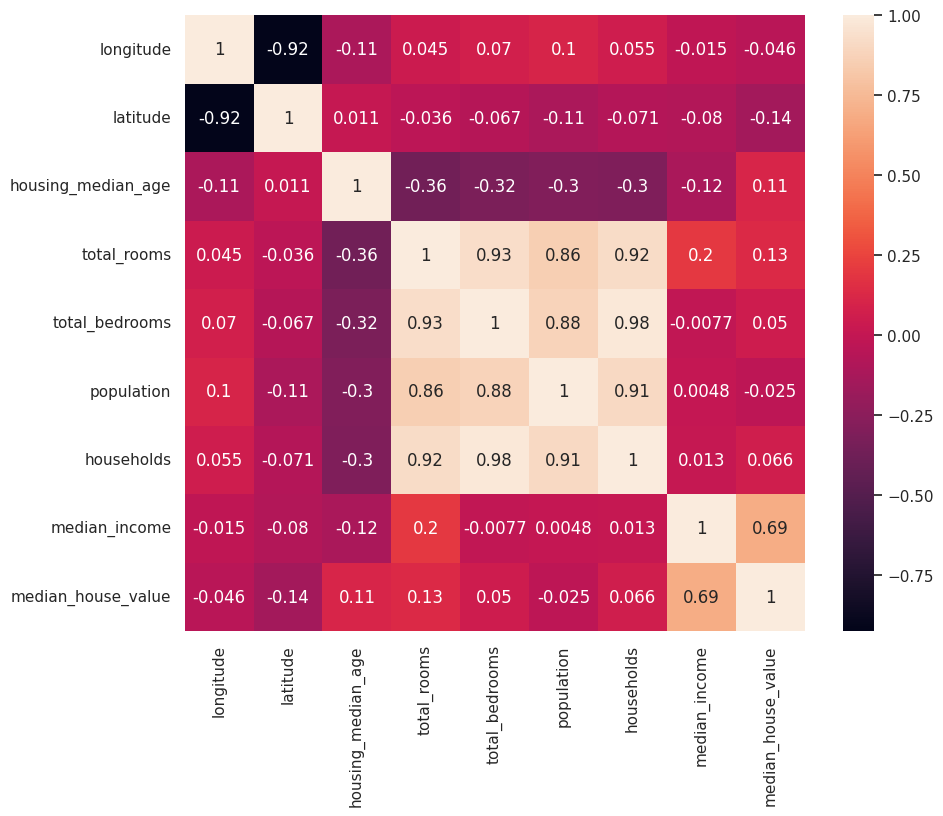

In [132]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True)
plt.show()

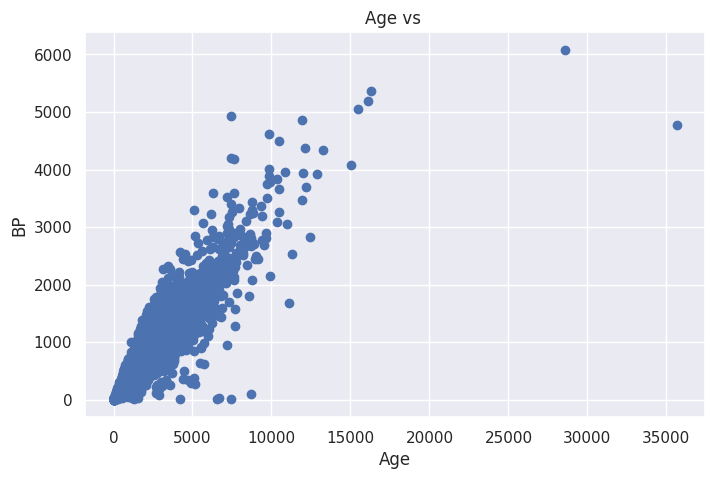

In [134]:
predictor = df["population"]
target = df["households"]
plt.figure(figsize=(8,5))
plt.title("Age vs ")
plt.scatter(predictor, target)
plt.xlabel('Age')
plt.ylabel('BP')
plt.show()

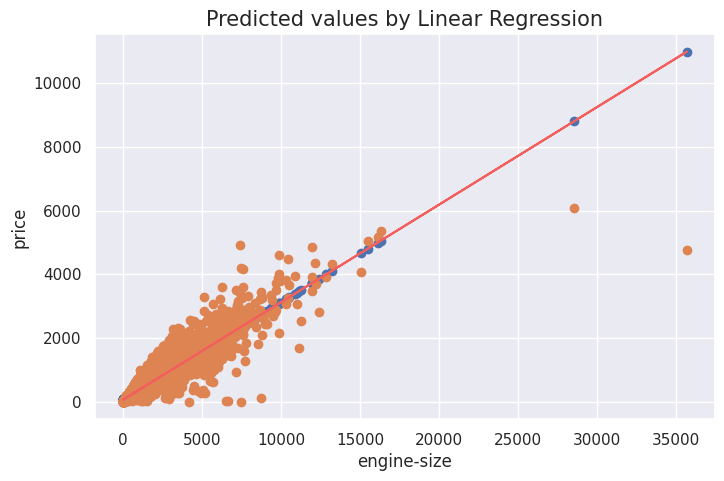

In [135]:
b1 = slope(predictor, target)
b0 = intercept(predictor, target, b1)
predicted = linear(predictor, b0, b1)
plt.figure(figsize = (8, 5))
plt.plot(predictor, predicted, color = '#f25f5c')
plt.scatter(predictor, predicted)
plt.title('Predicted values by Linear Regression', fontsize = 15)
plt.xlabel('engine-size')
plt.ylabel('price')
plt.scatter(predictor, target)
plt.show()